# Credit Card Fraud Detection Problem

This project will apply 2 machine learning (ML) modeling techniques to recognize fraudulent credit card transactions. The trained model will assess if a credit card transaction is legitimate or not.

In [20]:
# Importing needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install snapml
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import gc, sys

In [26]:
# Loading the dataset
data = pd.read_csv("C:/Users/Idris/OneDrive/Documents/CognitiveClass/creditcard.csv")
print("There are " + str(len(data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Practically, we will deal with a more volumenous dataset due to the field (banking) which usually involve a lot of records. Thus, we will inflate this data to 10* original size

In [37]:
n_inflation = 10

# Inflate the original dataset
inflated_data = pd.DataFrame(np.repeat(data.values, n_inflation, axis = 0), columns= data.columns)

print("There are " + str(len(inflated_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(inflated_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
inflated_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


### Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
# Check for missing columns
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Next is to identify the target label as well as features which will be used for prediction

In [46]:
# How many target labels do we have?
labels = inflated_data.Class.unique()


In [47]:
# Get the count of each class
sizes = inflated_data.Class.value_counts()

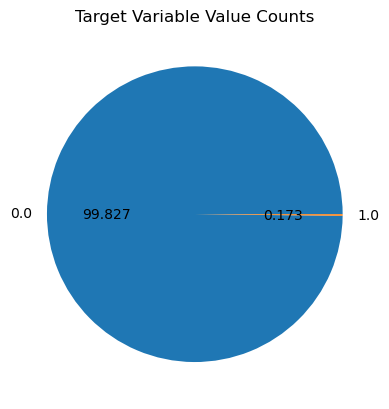

In [75]:
# Visualize the count of each class in the entire dataset

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%.3f')
ax.set_title('Target Variable Value Counts')
plt.show()

As seen above, the Class Variable (target label) has two (2) values. 

- 0 means the transaction isnt fraudulent
- 1 means the transaction is fraudulent

Next, we explore the amount for each transaction. Since its a continuous numerical variable, we will use a distribution plot such as histogram or box plot. To better simplify this, we will create a function for re-useability

In [90]:
def show_distribution(var):

    # Get statistics
    min_val = inflated_data[var].min()
    max_val = inflated_data[var].max()
    mean_val = inflated_data[var].mean()
    med_val = inflated_data[var].median()
    mod_val = inflated_data[var].mode()[0]


    print("Minimum: {:.2f}\nMaximum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\n".format(
    min_val, max_val, mean_val, med_val, mod_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (9,12))

    # plot an histogram
    ax[0].hist(inflated_data[var], facecolor = "b")
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel(var)

    # Add lines for the statistics
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

 

    # Add a title to the Figure
    fig.suptitle('Data Distribution of ' + var)
    
    # create boxplot
    ax[1].boxplot(inflated_data[var], vert = False)
    ax[1].set_xlabel(var)

    
    # Show the figure
    fig.show()

Minimum: 0.00
Maximum: 25691.16
Mean: 88.35
Median: 22.00
Mode: 1.00



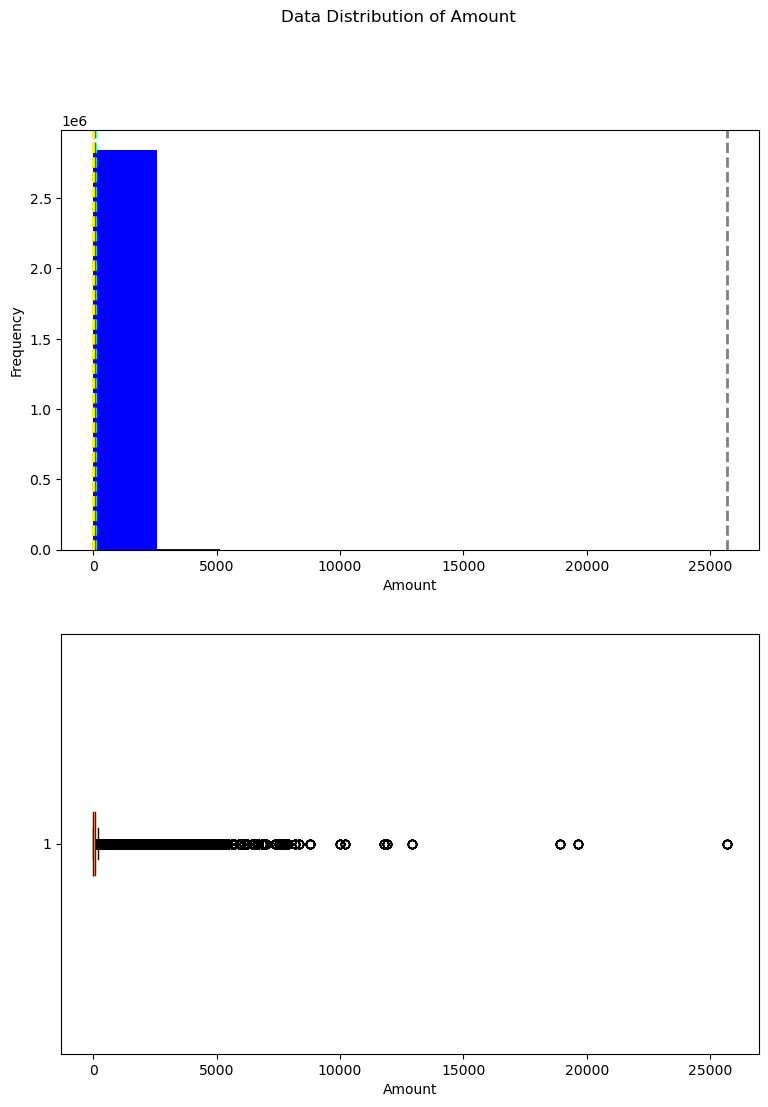

In [91]:
show_distribution("Amount")

We see that it is highly skewed. Lets check the Quartiles. Again, we deploy a function for code reusuability

In [96]:
def what_quantiles(var):
    quantiles = [1, 25, 75, 90, 99]
    for i in quantiles:
        n_quantile = inflated_data[var].quantile(i/100)
        print("{}th Quantile: {}".format(i, n_quantile))
        
# We can also use np.percentile(value_array, percentile)

In [97]:
what_quantiles("Amount")

1th Quantile: 0.12
25th Quantile: 5.6
75th Quantile: 77.17
90th Quantile: 203.0
99th Quantile: 1018.0


We see from above that there are quite a bunch of outliers. Lets take a look at the values > than the 99th Percentile and recreate the distribution chart

In [105]:
# Filter out the outliers
q99 = inflated_data.Amount.quantile(0.99)

q99_data = inflated_data[inflated_data.Amount <= q99]

In [107]:
q99_data.shape

(2819600, 31)

Text(0.5, 0, 'Amount')

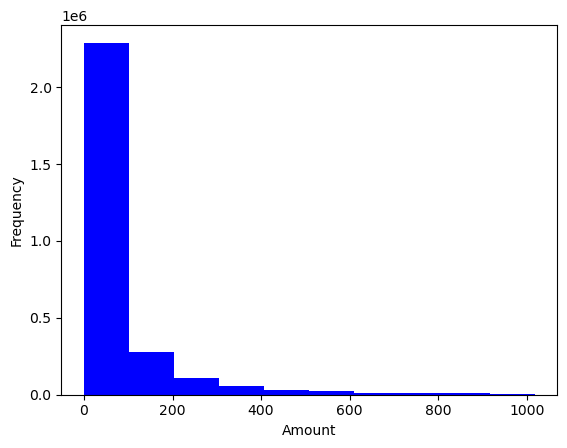

In [108]:
 # plot an histogram
plt.hist(q99_data["Amount"], facecolor = "b")
plt.ylabel('Frequency')
plt.xlabel("Amount")

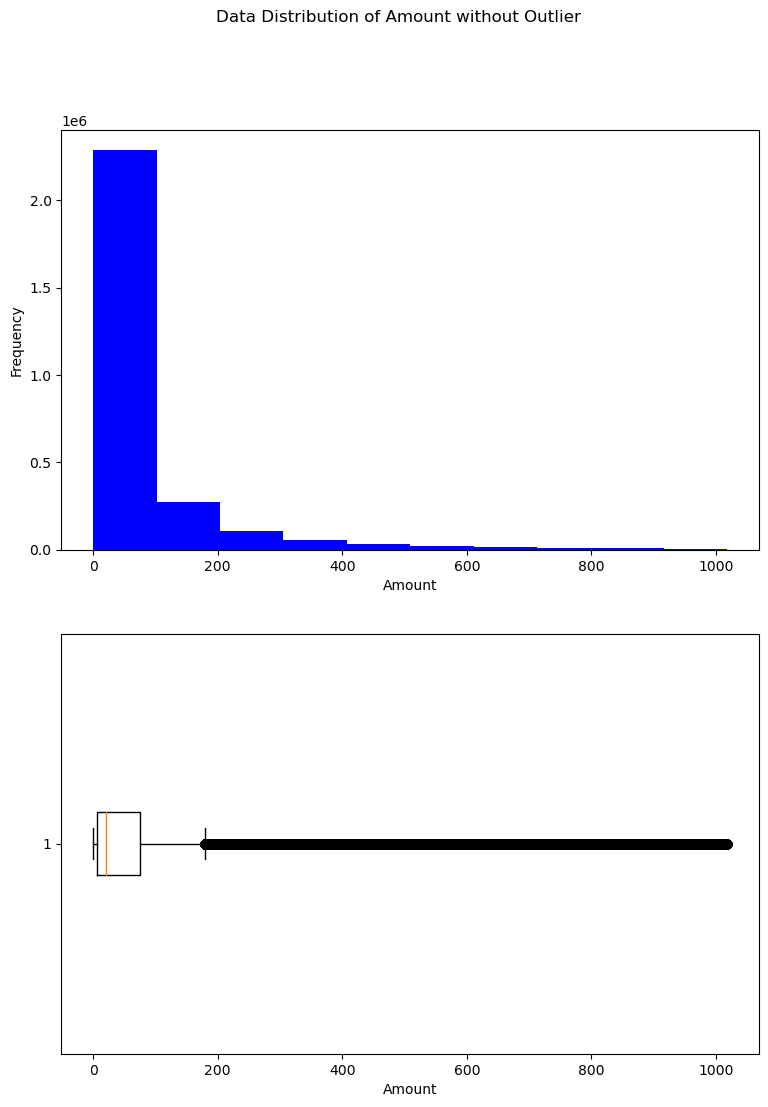

In [112]:
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# plot an histogram
ax[0].hist(q99_data["Amount"], facecolor = "b")
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel("Amount")

# Add a title to the Figure
fig.suptitle('Data Distribution of ' + "Amount without Outlier")

# create boxplot
ax[1].boxplot(q99_data["Amount"], vert = False)
ax[1].set_xlabel("Amount")


# Show the figure
fig.show()

Now, we see clearear a positive skewed dataset